//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


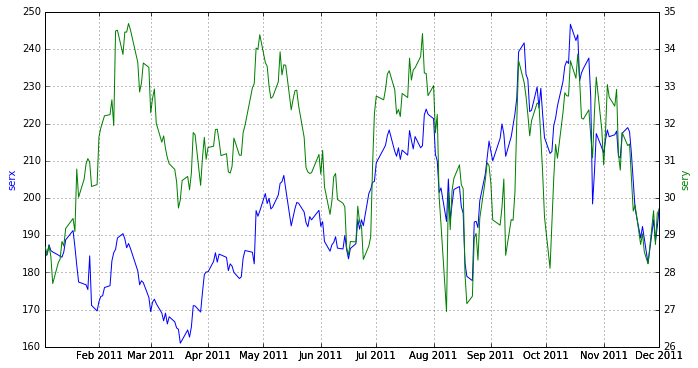

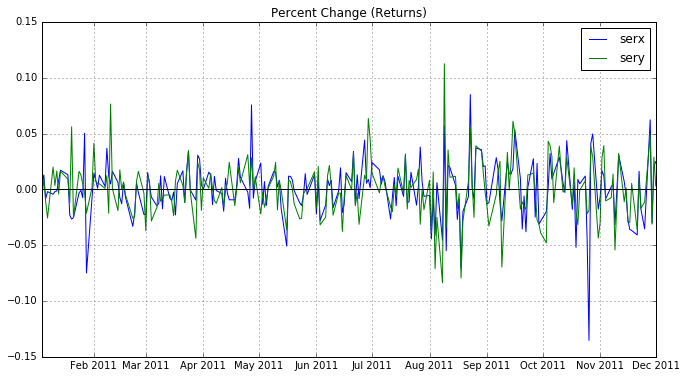

In [1]:
%matplotlib inline

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 30 15:54:02 2016

@author: tfalcoff
"""
import numpy as np
import pandas as pd
import pylab, quandl
import matplotlib.pyplot as plt

class TimeSeries:
    
    
    def plot(self, series_x, series_y):
       
        #dataframe from series
        df = pd.DataFrame({'serx':pd.Series(series_x), 'sery':pd.Series(series_y)})
        
        x = df['serx'] 
        y = df['sery']
        
        #plot
        pylab.rcParams['figure.figsize'] = (11,6)
        
        fig = pylab.figure()
        
        ax1 = fig.add_subplot(111)
        ax1.set_ylabel('serx', color='b')
        line1 = ax1.plot(x, 'b')
        
        ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
        ax2.yaxis.tick_right()
        ax2.yaxis.set_label_position('right')
        ax2.set_ylabel('sery', color='g')
        line2 = ax2.plot(y, 'g')
        
        plt.grid()
        
        pylab.show()
        
        
    def roc_plot(self, series_x, series_y):
        
        #dataframe from series
        df = pd.DataFrame({'serx':pd.Series(series_x), 'sery':pd.Series(series_y)})
        
        pct_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1))).dropna()
        
        #plot
        pylab.rcParams['figure.figsize'] = (11,6)
        
        fig = pylab.figure()
        
        ax1 = fig.add_subplot(111)
        line1 = ax1.plot(pct_change['serx'], color='b', label='serx')
        
        ax2 = fig.add_subplot(111)
        line2 = ax2.plot(pct_change['sery'], color='g', label='sery')
        
        plt.axhline(y=0, color='black')
        plt.legend()
        plt.grid()
        plt.title('Percent Change (Returns)')
        
        pylab.show()

        
TimeSer = TimeSeries()


#data
AMZN = quandl.get("XNAS/AMZN", authtoken="zo7kqTM5GbbuJUNsTKVa",
                    trim_start="2011-1-1",trim_end="2011-12-1")

EBAY = quandl.get("YAHOO/EBAY", authtoken="zo7kqTM5GbbuJUNsTKVa",
                    trim_start="2011-1-1",trim_end="2011-12-1")

stocks = pd.DataFrame({"AMZN":AMZN['Close'], "EBAY":EBAY['Close']})


#executuion
TimeSer.plot(stocks['AMZN'], stocks['EBAY'])
TimeSer.roc_plot(stocks['AMZN'], stocks['EBAY'])



    